# Introduction to Convolutional Neural Network

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

^C


--2023-06-26 01:06:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.192.80, 142.250.192.112, 142.251.42.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.192.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: 'pizza_steak.zip.1'

     0K .......... .......... .......... .......... ..........  0%  118K 15m6s
    50K .......... .......... .......... .......... ..........  0%  177K 12m35s
   100K .......... .......... .......... .......... ..........  0%  492K 9m36s
   150K .......... .......... .......... .......... ..........  0%  475K 8m8s
   200K .......... .......... .......... .......... ..........  0%  509K 7m12s
   250K .......... .......... .......... .......... ..........  0%  763K 6m23s
   300K .......... .......... .......... .......... ..........  0% 1.17M 5m41s
   350K ..........

## Inspect the data

In [57]:
# !dir pizza_steak
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!cd pizza_steak/train

In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import pathlib
import  numpy as np
data_dir= pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape:{img.shape}")
    return img

['1053665.jpg']
Image shape:(512, 512, 3)
['857888.jpg']
Image shape:(512, 384, 3)


(512, 384, 3)

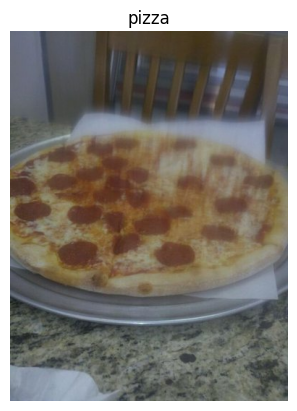

In [6]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="steak")

# !pip install matplotlib

img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

import tensorflow as tf
tf.constant(img)

img/255. # converting data to normalization

img.shape

In [7]:
## An end to end example

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir ="pizza_steak/train"
test_dir ="pizza_steak/test"
es = EarlyStopping(monitor='loss', patience=10)
train_data= train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data= valid_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# Build a CNN Model
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(filters=100, 
                                kernel_size=3,
                                activation='relu',
                                input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding="valid"),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.Conv2D(10,3,activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data),callbacks=[es])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 500ms/step - loss: 0.6676 - accuracy: 0.5761 - val_loss: 0.5390 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 12s 251ms/step - loss: 0.5039 - accuracy: 0.7770 - val_loss: 0.3915 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 12s 249ms/step - loss: 0.4146 - accuracy: 0.8051 - val_loss: 0.3839 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 12s 249ms/step - loss: 0.3994 - accuracy: 0.8290 - val_loss: 0.4216 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 12s 248ms/step - loss: 0.3674 - accuracy: 0.8424 - val_loss: 0.3740 - val_accuracy: 0.8480


['1752330.jpg']
Image shape:(512, 512, 3)
['2774899.jpg']
Image shape:(512, 512, 3)


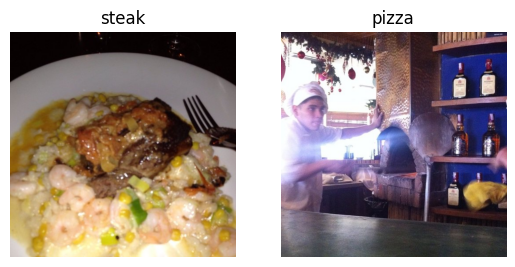

In [8]:
# Visualize datta
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [9]:
train_dir ="pizza_steak/train/"
test_dir = "pizza_steak/test/"


Our next step is to turn our data into ***batches***
a batch is a small subset of data rather than look at all 100000 images at one timea  model might only look at 32 at a time
it does this for a couple of reasons
1. 10000 images might be more  might not fit into the memory of your processor
2. trying to learn the pattern in 10000 images in one hit could result in the model not being able to learn very well

we split data into batchges of 32

why 32???

Because 32 is bestttt


In [10]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [11]:
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
images, labels =train_data.next()
len(images),len(labels)

(32, 32)

In [13]:
images[:2],images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [14]:
images[7].shape

(224, 224, 3)

In [15]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

# Create a CNN Model

A base line is a relatively simple model or existing result that you setup when beginning a machine experimenting, you try to beat the baseline


In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential



In [17]:
model_4 = Sequential(
    [
        Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation='relu',input_shape=(224,224,3)),
        Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation='relu',input_shape=(224,224,3)),
        Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",activation='relu',input_shape=(224,224,3)),
Flatten(),
Dense(1,activation="sigmoid")
    ]
)

In [18]:
model_4.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [19]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_4=model_4.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 172ms/step - loss: 1.5201 - accuracy: 0.6406 - val_loss: 0.3868 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4078 - accuracy: 0.8214 - val_loss: 0.3962 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3121 - accuracy: 0.8787 - val_loss: 0.3387 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.1717 - accuracy: 0.9601 - val_loss: 0.4037 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.0784 - accuracy: 0.9811 - val_loss: 0.3688 - val_accuracy: 0.8360


In [21]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 85ms/step - loss: 0.3740 - accuracy: 0.8480


[0.37399816513061523, 0.8479999899864197]

In [22]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 87ms/step - loss: 0.3688 - accuracy: 0.8360


[0.3688189685344696, 0.8360000252723694]

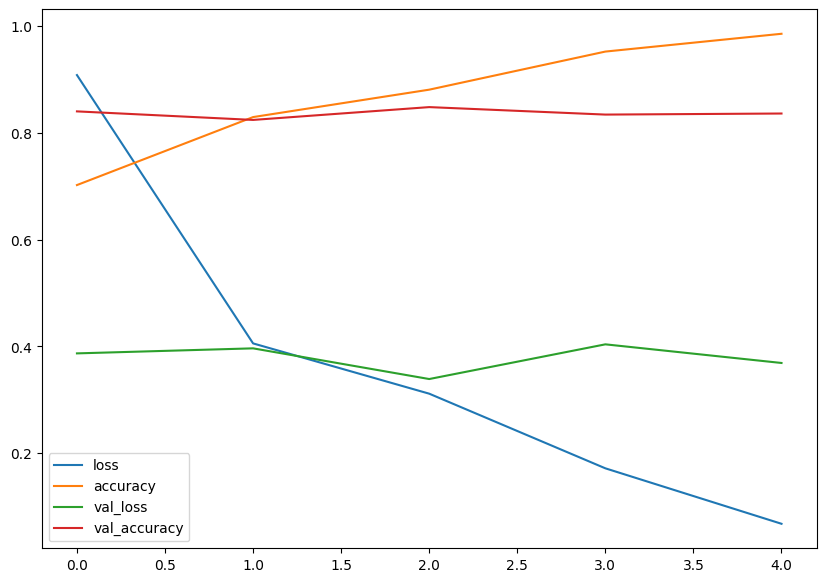

In [23]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [24]:
# plot validation and training curves seperately
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss =  history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    

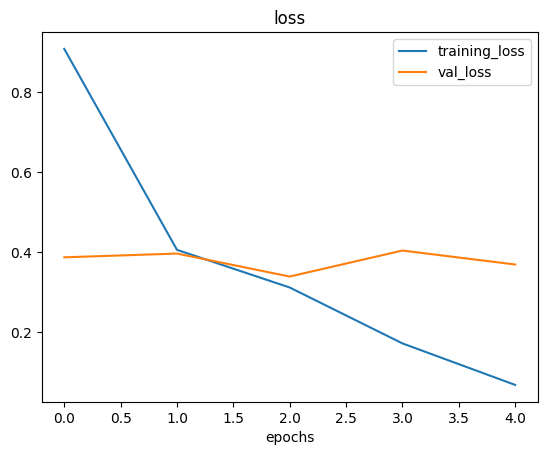

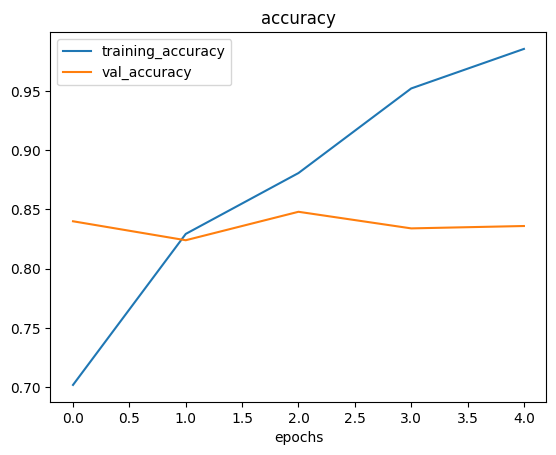

In [25]:
plot_loss_curves(history_4)

In [26]:
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2) ,
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

In [27]:
model_5.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [28]:
history_5=  model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 138ms/step - loss: 0.6701 - accuracy: 0.5557 - val_loss: 0.4890 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.5258 - accuracy: 0.7390 - val_loss: 0.4374 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4349 - accuracy: 0.7809 - val_loss: 0.3425 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.3886 - accuracy: 0.8186 - val_loss: 0.3716 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3686 - accuracy: 0.8426 - val_loss: 0.3444 - val_accuracy: 0.8520


In [29]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)             

In [30]:
model_5.evaluate(test_data)

16/16 [==============================] - 2s 90ms/step - loss: 0.3444 - accuracy: 0.8520


[0.34440919756889343, 0.8519999980926514]

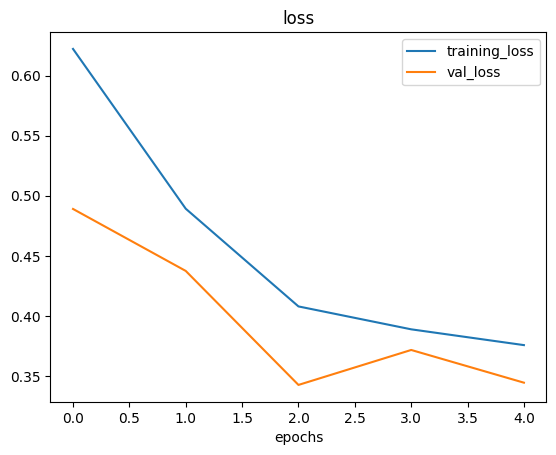

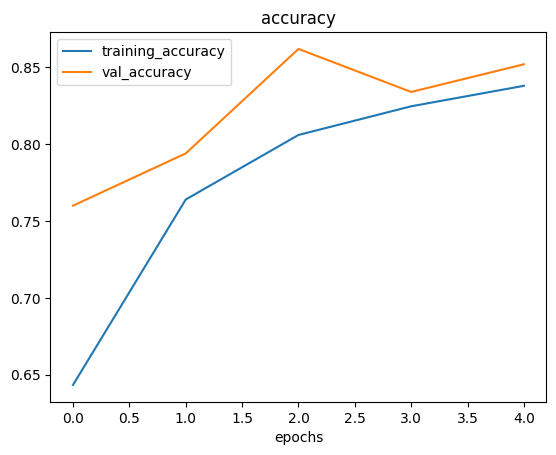

In [31]:
plot_loss_curves(history_5)

In [47]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [48]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [51]:
# Get data batch samples
images, labels = train_data.next()


In [56]:
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

showing imahge number:26


(-0.5, 223.5, 223.5, -0.5)

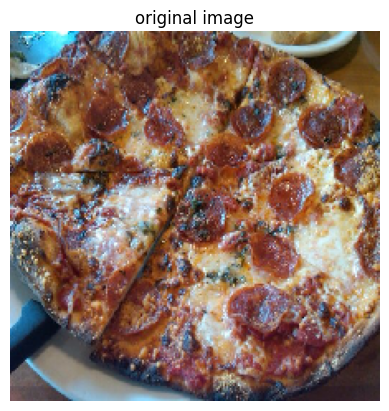

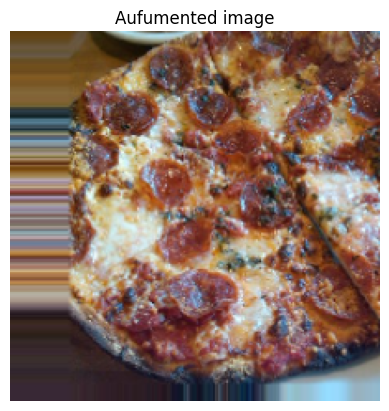

In [58]:
import random 
random_number = random.randint(0,32)
print(f"showing imahge number:{random_number}")
plt.imshow(images[random_number])
plt.title("original image")
plt.axis(False)
plt.figure()
# plt.imshow(augumented_images[random_number])
plt.imshow(augumented_images[random_number])
plt.title(f"Aufumented image")
plt.axis(False)


In [60]:
model_6 = Sequential(
    [
        Conv2D(10,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation="relu"), 
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(1,activation="sigmoid")

    ]
)
model_6.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])
history_6 = model_6.fit(train_data_augumented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 320ms/step - loss: 0.7102 - accuracy: 0.5521 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 15s 311ms/step - loss: 0.6940 - accuracy: 0.4549 - val_loss: 0.6840 - val_accuracy: 0.6440
Epoch 3/5
47/47 [==============================] - 15s 316ms/step - loss: 0.6823 - accuracy: 0.6360 - val_loss: 0.7039 - val_accuracy: 0.5080
Epoch 4/5
47/47 [==============================] - 15s 314ms/step - loss: 0.6520 - accuracy: 0.6339 - val_loss: 0.6310 - val_accuracy: 0.6100
Epoch 5/5
47/47 [==============================] - 15s 323ms/step - loss: 0.6597 - accuracy: 0.5979 - val_loss: 0.5827 - val_accuracy: 0.7660


In [61]:
# Import data and augment it from training directory
# print("Augmented training images:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)


Found 1500 images belonging to 2 classes.


In [75]:
model_7 = Sequential(
    [
        Conv2D(20,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(20,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(20,3,activation="relu"), 
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation="relu"), 
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(1,activation="sigmoid")

    ]
)
model_7.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 17s 354ms/step - loss: 0.6855 - accuracy: 0.5657 - val_loss: 0.5410 - val_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 15s 324ms/step - loss: 0.6123 - accuracy: 0.6631 - val_loss: 0.4415 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 15s 319ms/step - loss: 0.5104 - accuracy: 0.7709 - val_loss: 0.3774 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 15s 321ms/step - loss: 0.4896 - accuracy: 0.7612 - val_loss: 0.3696 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 15s 324ms/step - loss: 0.4837 - accuracy: 0.7724 - val_loss: 0.3347 - val_accuracy: 0.8560


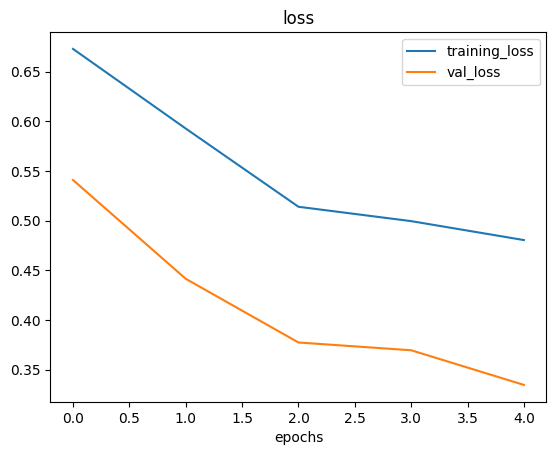

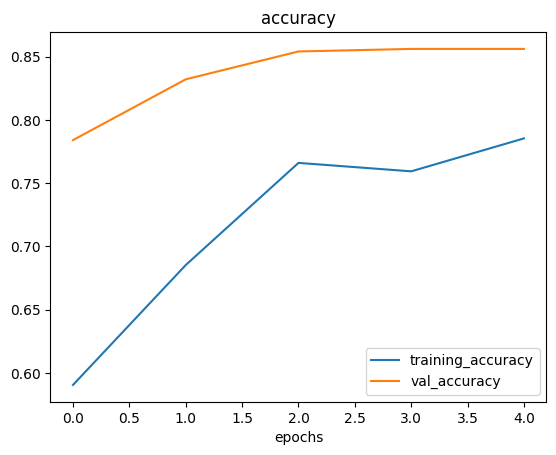

In [76]:
plot_loss_curves(history_7)

--2023-06-26 02:15:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: '03-steak.jpeg'

     0K .......... .......... .......... .......... ..........  2%  525K 4s
    50K .......... .......... .......... .......... ..........  5% 1.58M 2s
   100K .......... .......... .......... .......... ..........  7%  837K 2s
   150K .......... .......... .......... .......... .......... 10% 1.61M 2s
   200K .......... .......... .......... .......... .......... 12% 1.56M 2s
   250K .......... .......... .......... .......... .......... 15% 2.76M 1s
   300K .......... .......... .......... .......... .......... 18% 2.07M 1s
   350K ....

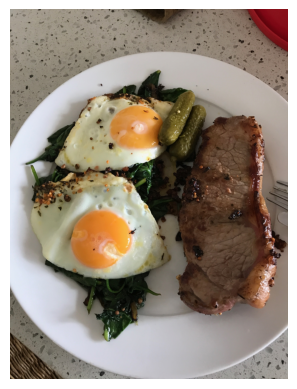

In [77]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)  
plt.axis(False);

In [80]:
steak.shape

(4032, 3024, 3)

In [84]:
def load_and_prep_image(filename,img_shape=224):
    img= tf.io.read_file(filename)
    img= tf.image.decode_image(img)
    img = tf.image.resize(img,size=[img_shape,img_shape])
    img = img/255.
    return img

In [85]:
steak=load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [90]:
pred=model_7.predict(tf.expand_dims(steak,axis=0))
print(pred)

[[0.90767837]]


In [91]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [93]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [94]:
def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0))
    pred_class= class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction:{pred_class}")
    plt.axis(False)

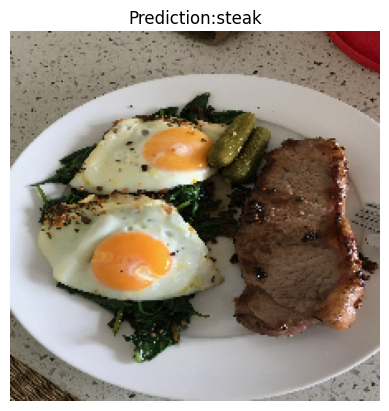

In [95]:
pred_and_plot(model_7,"03-steak.jpeg")

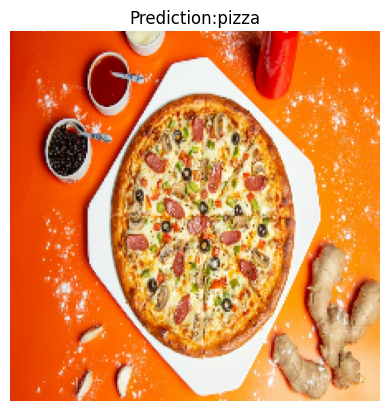

In [96]:
pred_and_plot(model_7,"pizza_test.jpg")